<a href="https://colab.research.google.com/github/hardik1408/MADHAV-LABS/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Task: Summer Research Internship
##Task 2: Use relevant features for Raga Identification
### HARDIK JINDAL [220420]

## INSTALLING THE DATASET FROM KAGGLE

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
%mkdir music
%cd music

/content/music


In [ ]:
!kaggle datasets download -d kcwaghmarewaghmare/indian-music-raga


 99% 941M/955M [00:04<00:00, 224MB/s]
100% 955M/955M [00:04<00:00, 205MB/s]


In [ ]:
!unzip -q indian-music-raga.zip


## INSTALLING AND IMPORTING NECESSARY LIBRARIES

In [26]:
!pip install librosa


In [27]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import sklearn

## VISUALIZING VARIOUS FEATURES OF THE DATASET

There are various features which can be extracted from an audio file such as:
- Zero Crossing Rate
- STFT (Short Time Fourier Transforms)
- Spectogram
- Mel Spectogram
- Mel Frequency Cepstral Coefficients
- Chromagram
- Spectral Centroids
- Spectral Bandwidth
- Tempo and Beats
-Spectral Rolloff
- Harmonic and Percussive Components

I have tried to extract some the above mentioned features below

To Visualize the features of the dataset, I perform actions on 3 types of ragas to better understand their features.

In [ ]:
audio1= "/content/music/Bhairavi01.wav"
audio2= "/content/music/DKanada01.wav"
audio3= "/content/music/asavari01.wav"

Extracting the data from these ragas

In [ ]:
data1,sr1=librosa.load(audio1)
data2,sr2=librosa.load(audio2)
data3,sr3=librosa.load(audio3)
# ipd.Audio(audio1)

### Obtaining the Amplitude vs time graph

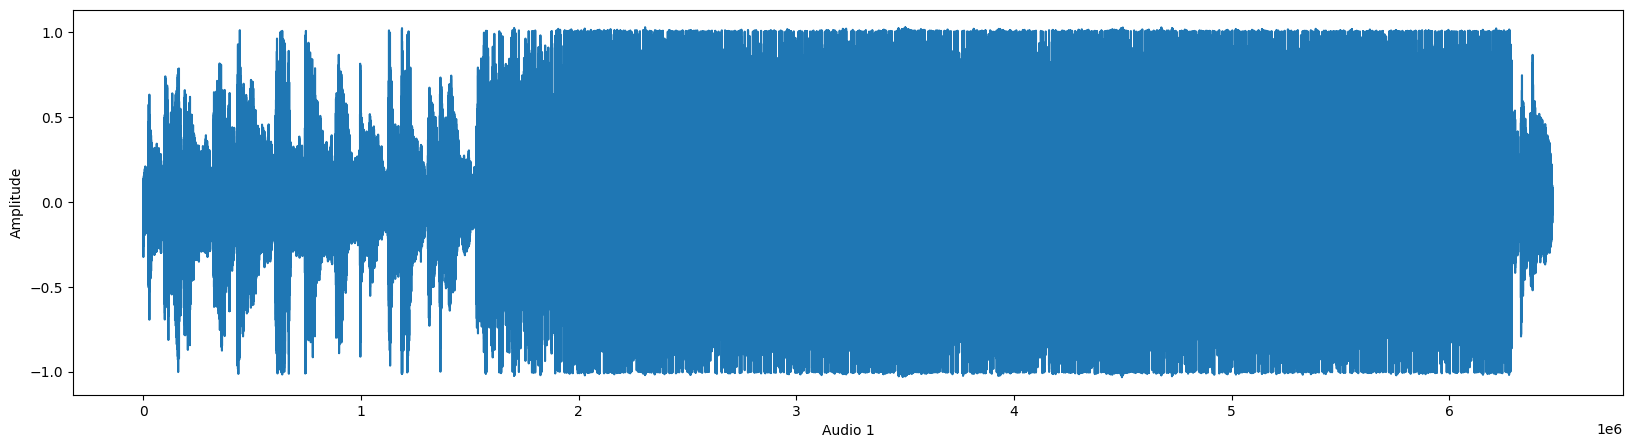

<Figure size 2000x500 with 0 Axes>

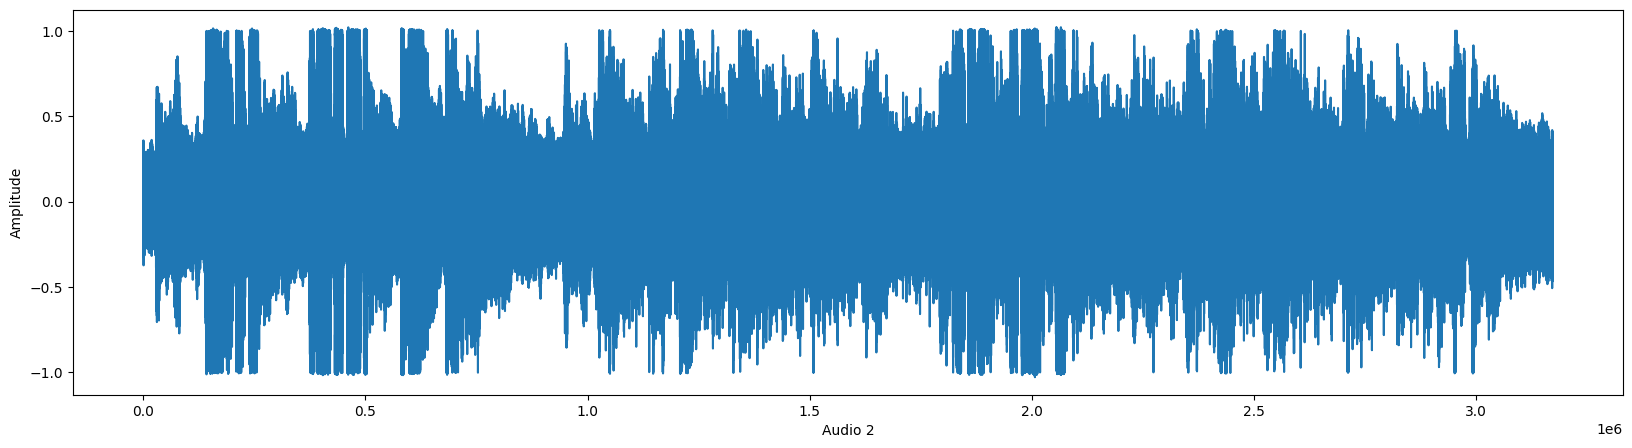

<Figure size 2000x500 with 0 Axes>

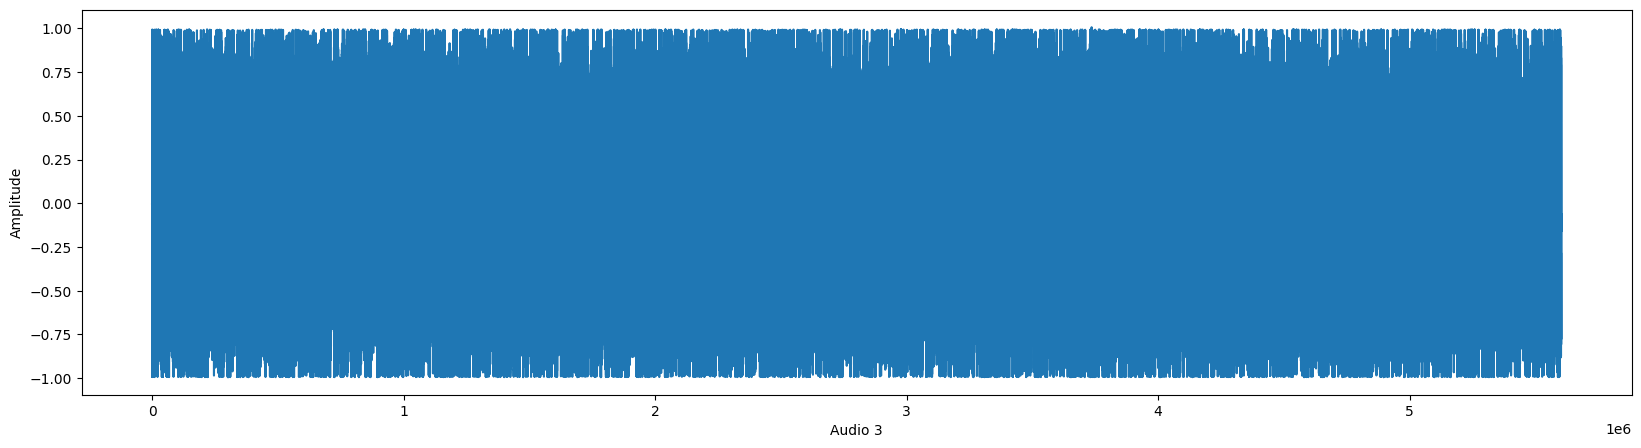

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data1)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.figure(figsize=(20, 5))
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(data2)
plt.xlabel('Audio 2')
plt.ylabel('Amplitude')
plt.figure(figsize=(20, 5))
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(data3)
plt.xlabel('Audio 3')
plt.ylabel('Amplitude')
plt.figure(figsize=(20, 5))
plt.show()

### Chromagraph

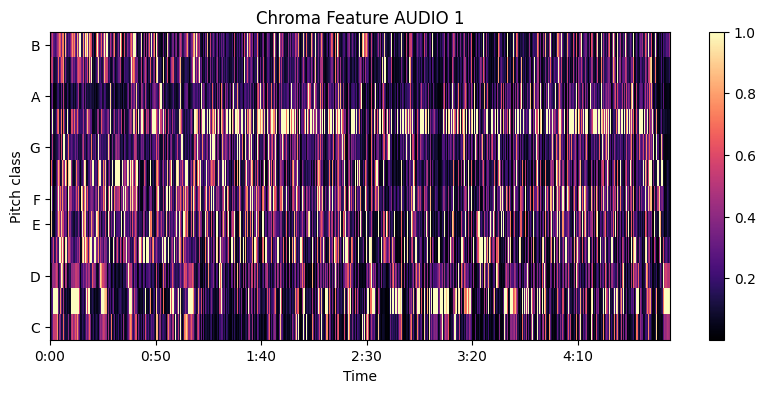

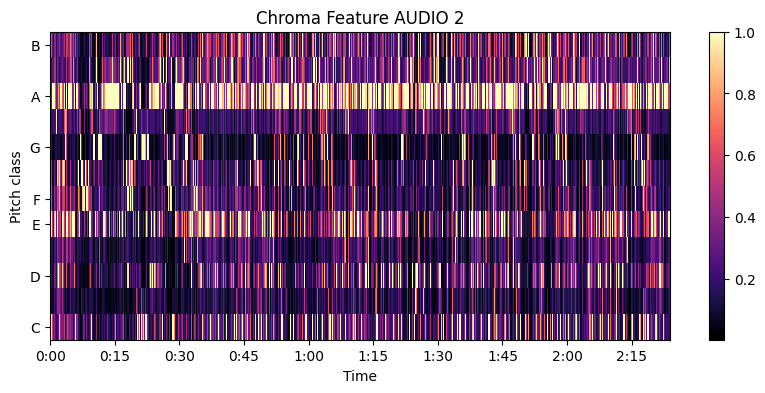

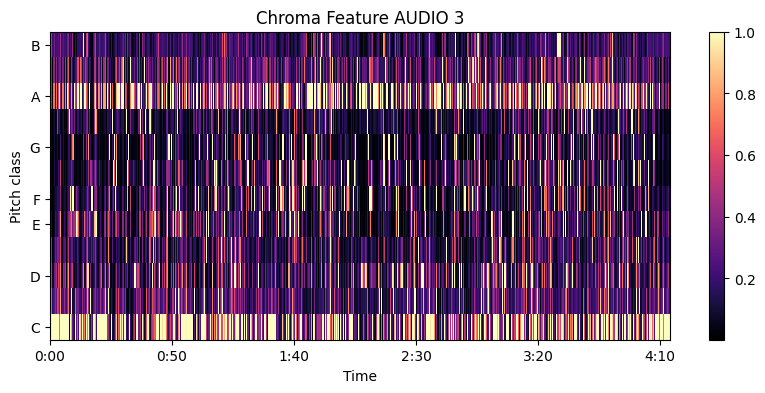

In [35]:
chroma1 = librosa.feature.chroma_stft(y=data1, sr=sr1)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma1, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Feature AUDIO 1')
plt.show()

chroma2 = librosa.feature.chroma_stft(y=data2, sr=sr2)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma2, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Feature AUDIO 2')
plt.show()

chroma3 = librosa.feature.chroma_stft(y=data3, sr=sr3)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma3, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Feature AUDIO 3')
plt.show()

### Mel Frequency Cepstral Coefficients

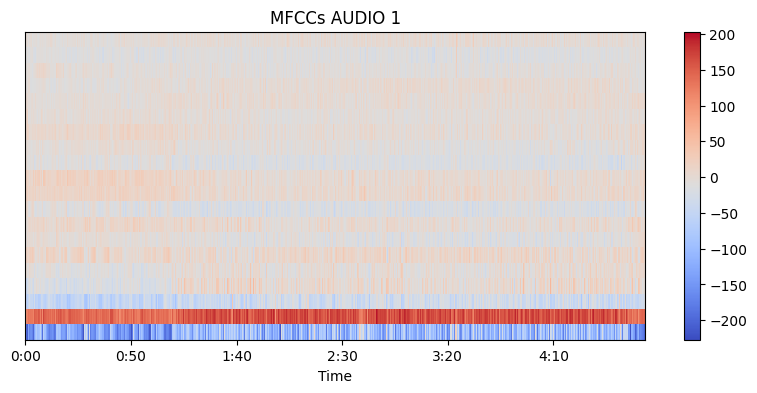

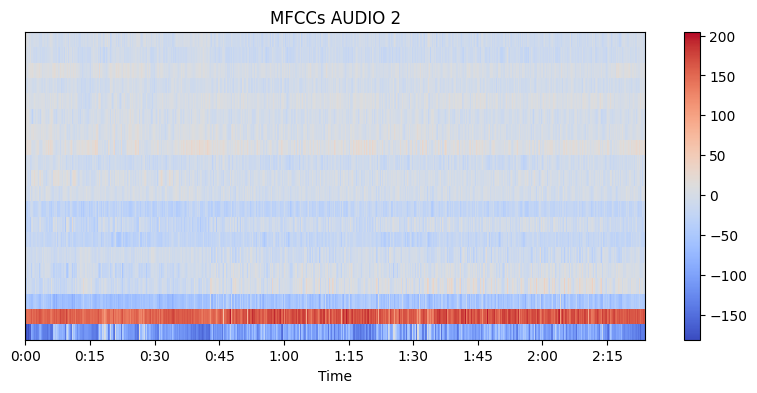

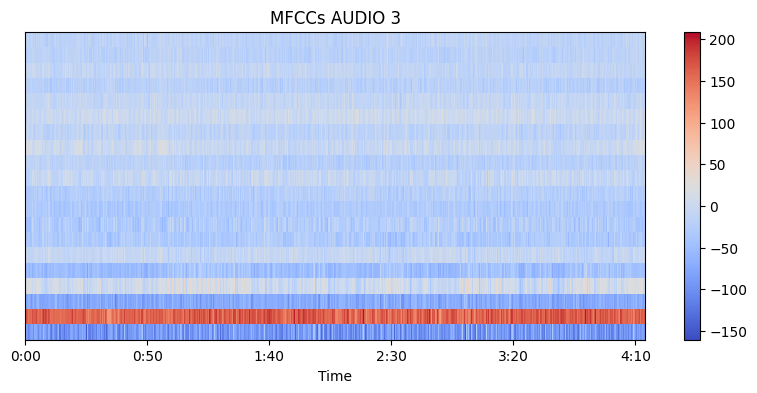

In [34]:
mfccs1 = librosa.feature.mfcc(y=data1, sr=sr1)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs1, x_axis='time')
plt.colorbar()
plt.title('MFCCs AUDIO 1')
plt.show()

mfccs2 = librosa.feature.mfcc(y=data2, sr=sr2)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs2, x_axis='time')
plt.colorbar()
plt.title('MFCCs AUDIO 2')
plt.show()

mfccs3 = librosa.feature.mfcc(y=data3, sr=sr3)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs3, x_axis='time')
plt.colorbar()
plt.title('MFCCs AUDIO 3')
plt.show()


### STFT (Short Time Fourier Transforms)
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows

Hop length is the number of samples between each successive FFT

Frequency on x-axis and Intensity on y-axis

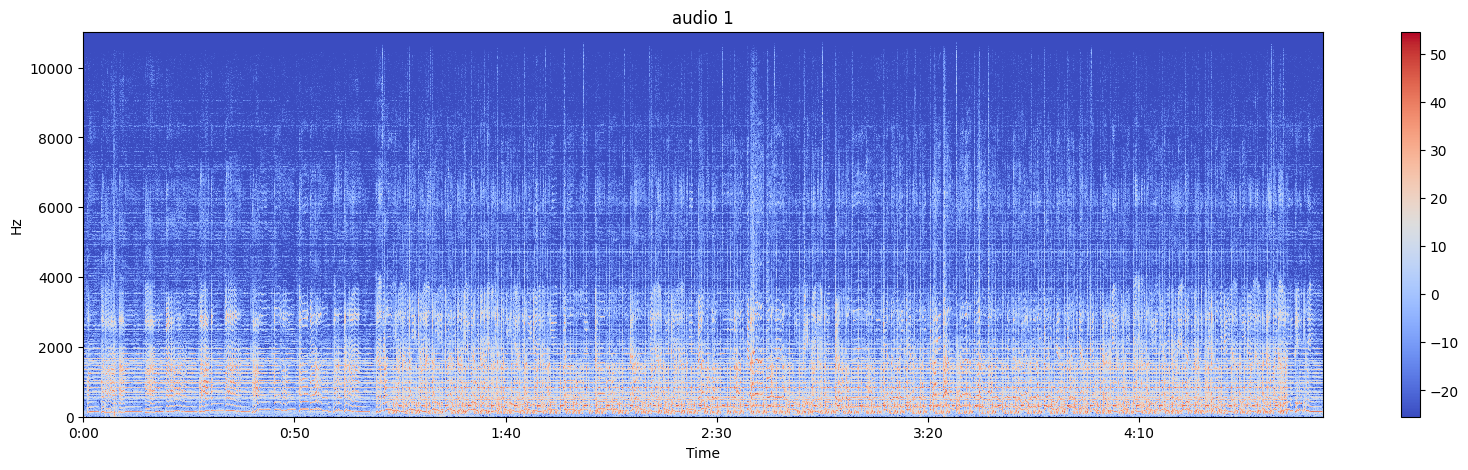

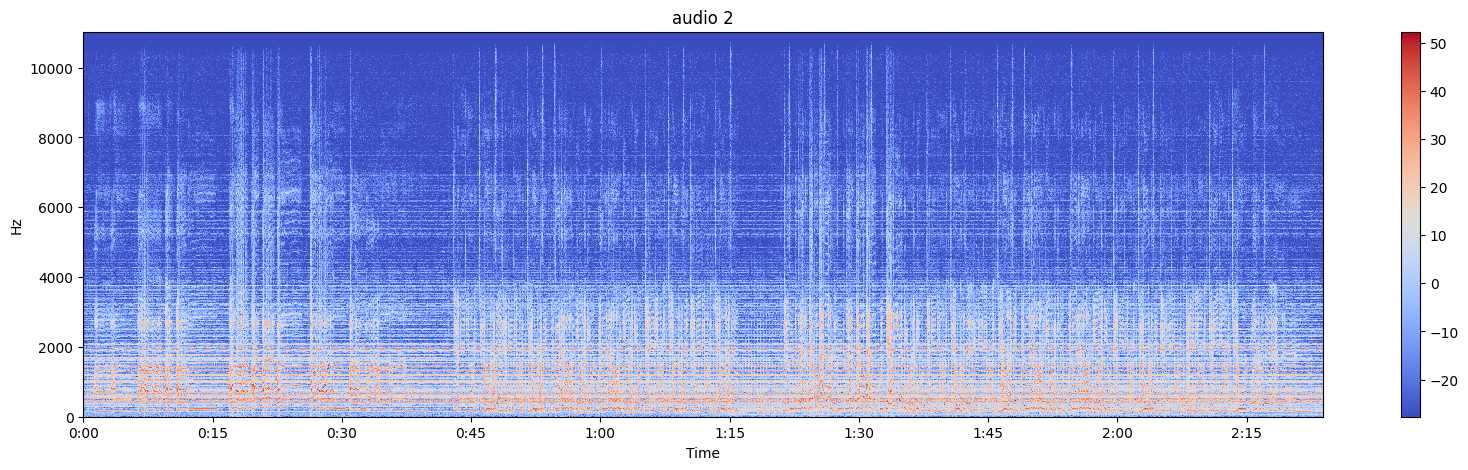

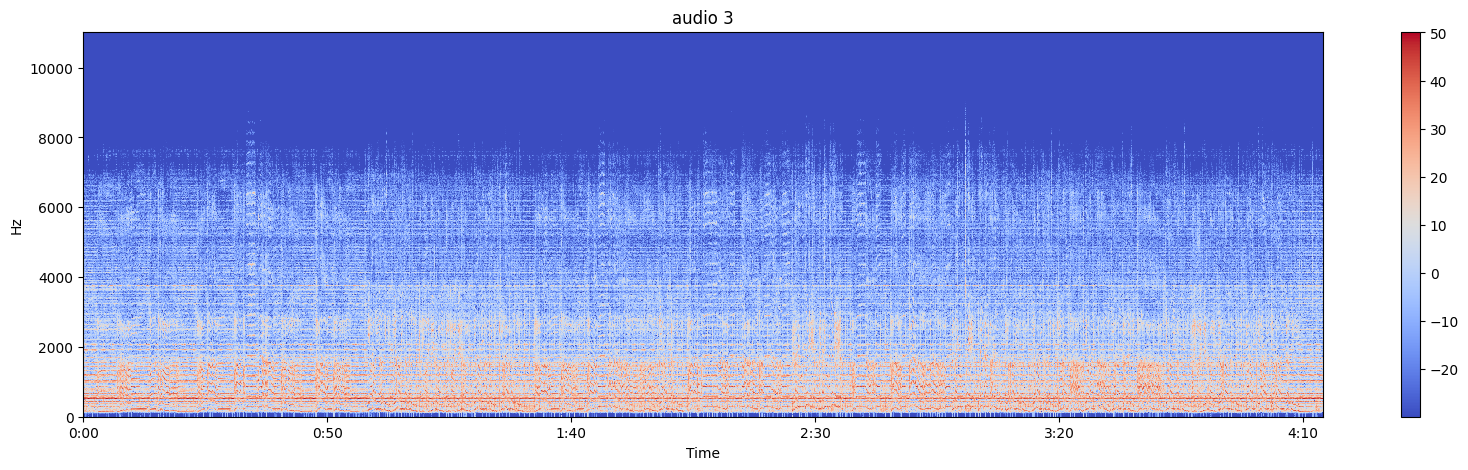

In [ ]:
X = librosa.stft(data1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
plt.title("audio 1")
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()
X = librosa.stft(data2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
plt.title("audio 2")
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()
X = librosa.stft(data3)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
plt.title("audio 3")
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()

### Zero Crossing Rate
Zero Crossing Rate indicates the number of times that a signal crosses the horizontal axis

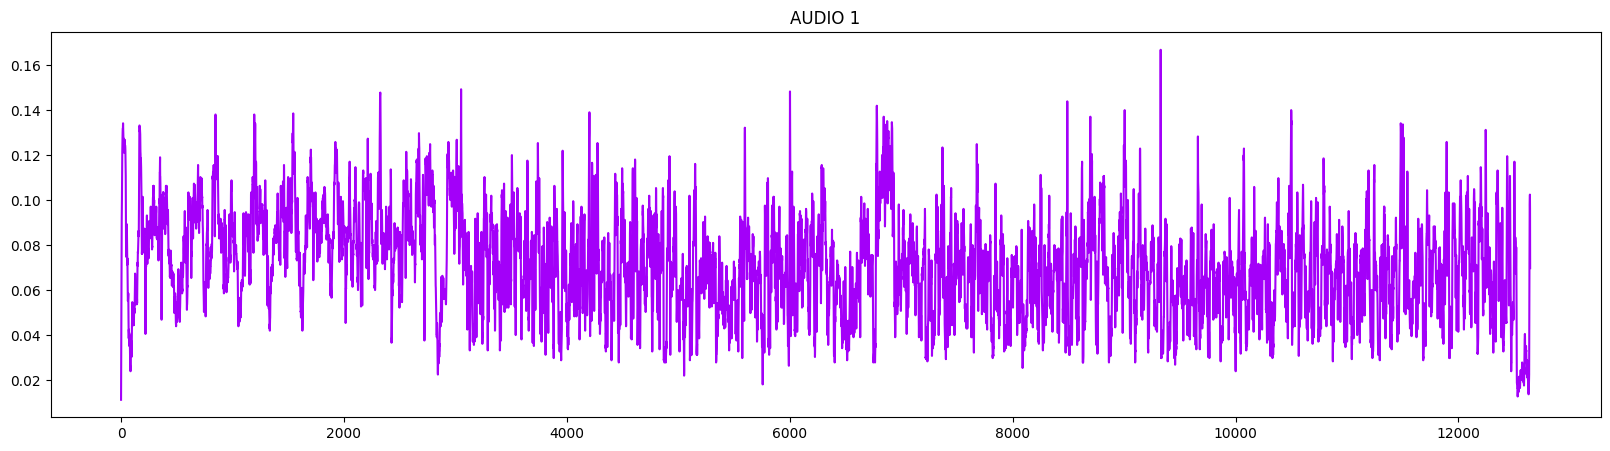

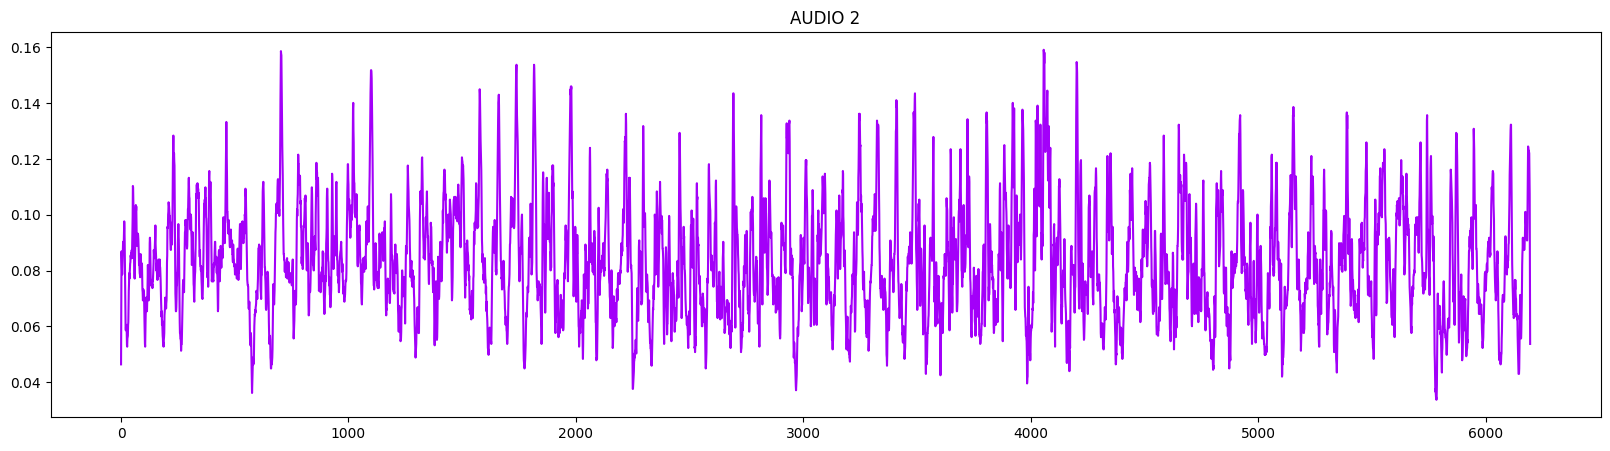

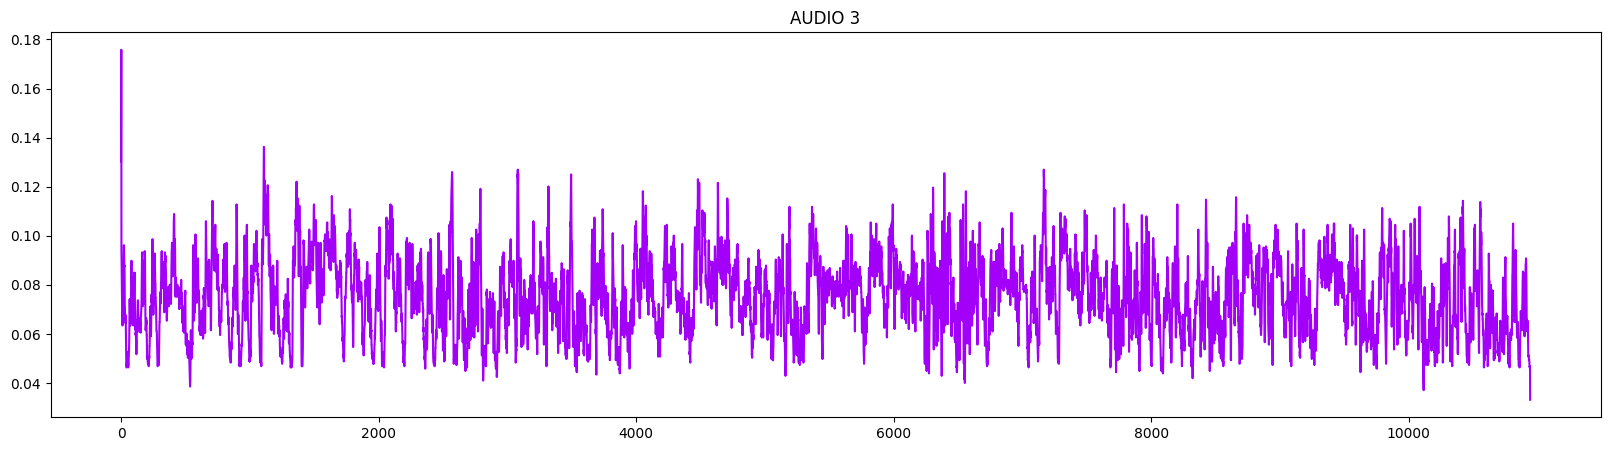

In [ ]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data1,hop_length = 512)[0]
plt.figure(figsize=(20, 5))
plt.title("AUDIO 1")
plt.plot(zero_crossing_rate,color = "#A300F9")

zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data2,hop_length = 512)[0]
plt.figure(figsize=(20, 5))
plt.title("AUDIO 2")
plt.plot(zero_crossing_rate,color = "#A300F9")

zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data3,hop_length = 512)[0]
plt.figure(figsize=(20, 5))
plt.title("AUDIO 3")
plt.plot(zero_crossing_rate,color = "#A300F9")

### Spectral Centroids
Spectral Centroids indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound.

It is calculated as the weighted mean of the frequencies present in the signal, determined using a Fourier transform, with their magnitudes as the weights

Because the spectral centroid is a good predictor of the "brightness" of a sound, it is widely used in digital audio and music processing as an automatic measure of musical timbre (tone color or tone quality)

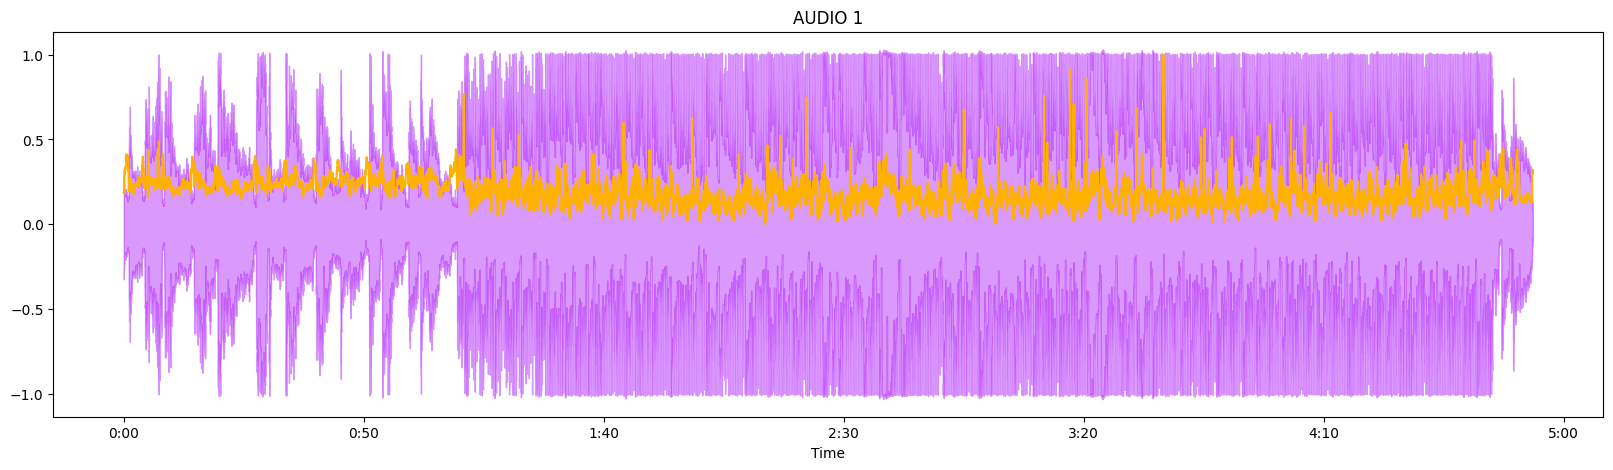

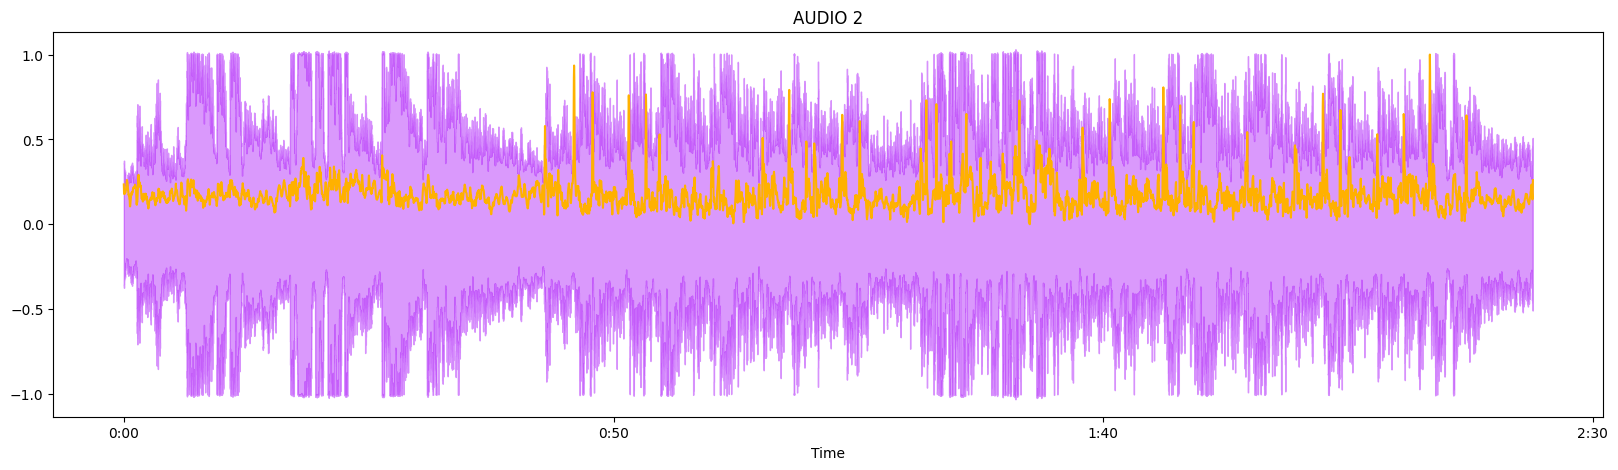

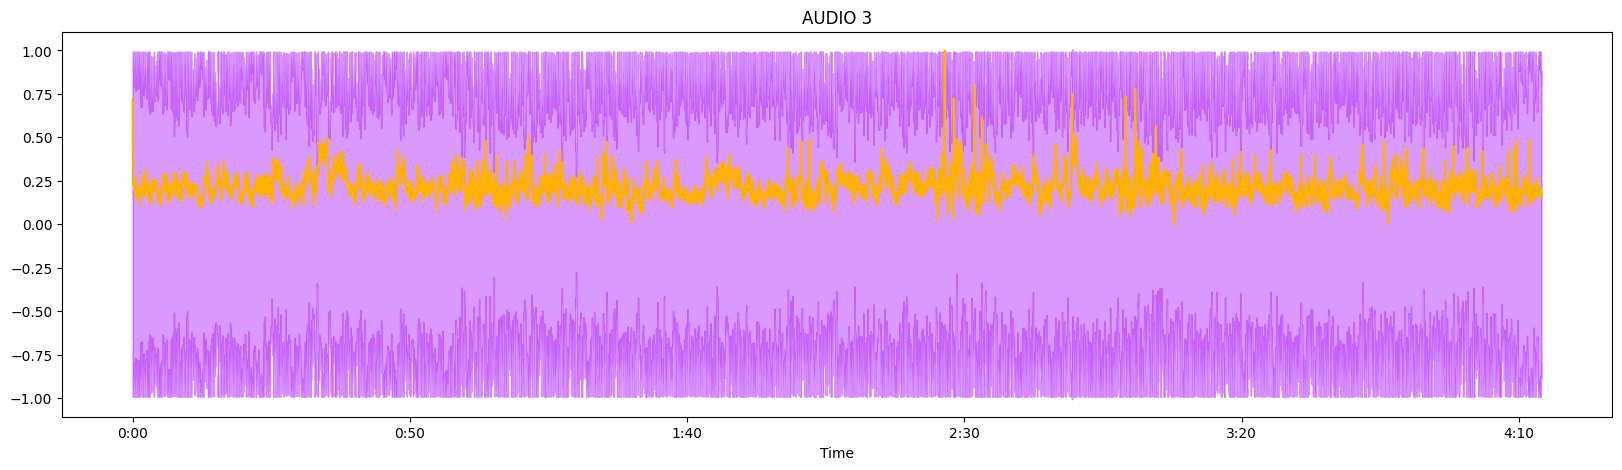

In [ ]:

spectral_centroids1 = librosa.feature.spectral_centroid(y=data1, sr=sr1)[0]
frames = range(len(spectral_centroids1))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20, 5))
plt.title("AUDIO 1")
librosa.display.waveshow(data1, sr=sr1, alpha=0.4, color = '#A300F9')
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids1, axis=0), color='#FFB100')

spectral_centroids2 = librosa.feature.spectral_centroid(y=data2, sr=sr2)[0]
frames = range(len(spectral_centroids2))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20, 5))
plt.title("AUDIO 2")
librosa.display.waveshow(data2, sr=sr2, alpha=0.4, color = '#A300F9')
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids2, axis=0), color='#FFB100')

spectral_centroids3 = librosa.feature.spectral_centroid(y=data3, sr=sr3)[0]
frames = range(len(spectral_centroids3))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20, 5))
plt.title("AUDIO 3")
librosa.display.waveshow(data3, sr=sr3, alpha=0.4, color = '#A300F9')
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids3, axis=0), color='#FFB100')

### Harmonic and Percussive Components
Musical sounds can comprise a wide range of sound components with different acoustic qualities. In particular, we consider two broad categories of sounds: harmonic sounds and percussive sounds.

Loosely speaking, a harmonic sound is what we perceive as pitched sound, what makes us hear melodies and chords. The prototype of a harmonic sound is the acoustic realization of a sinusoid, which corresponds to a horizontal line in a spectrogram representation.

On the other hand, a percussive sound is what we perceive as a clash, a knock, a clap, or a click. The prototype of a percussive sound is the acoustic realization of an impulse, which corresponds to a vertical line in a spectrogram representation

<Figure size 2000x500 with 0 Axes>

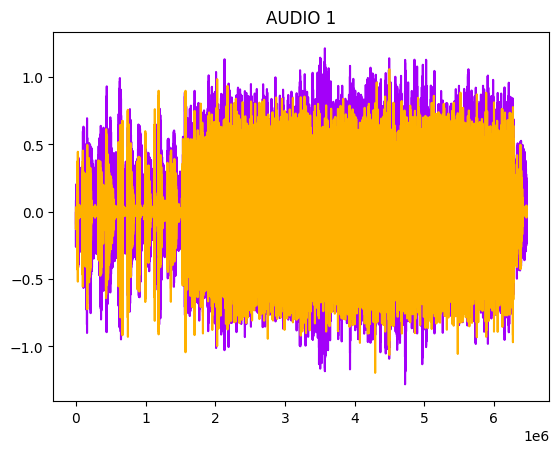

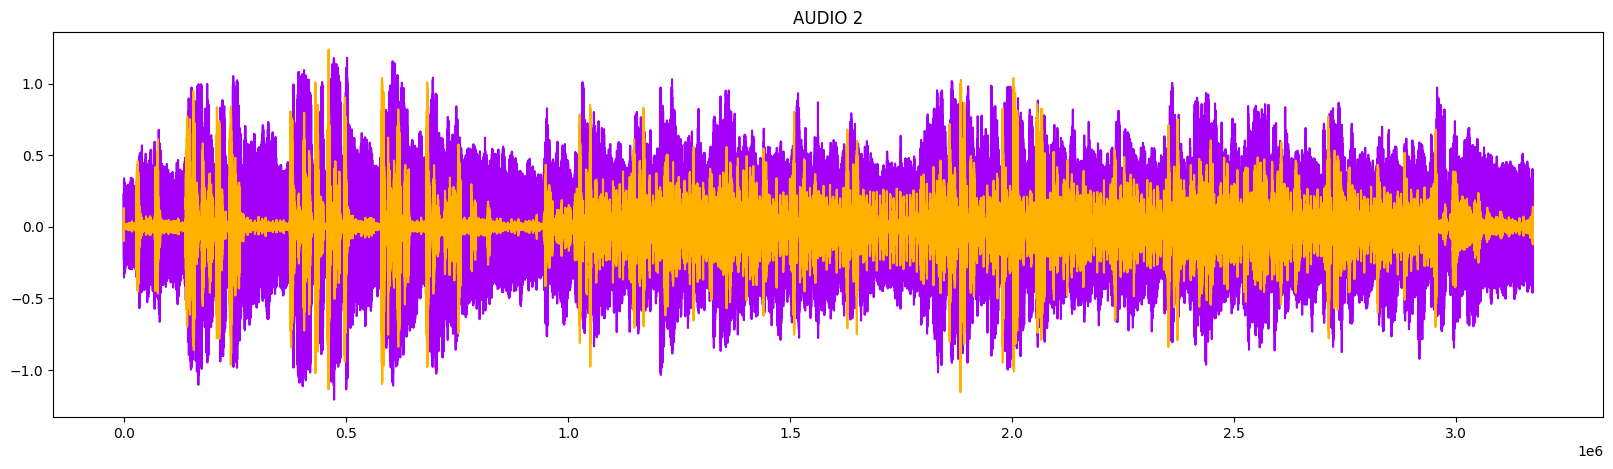

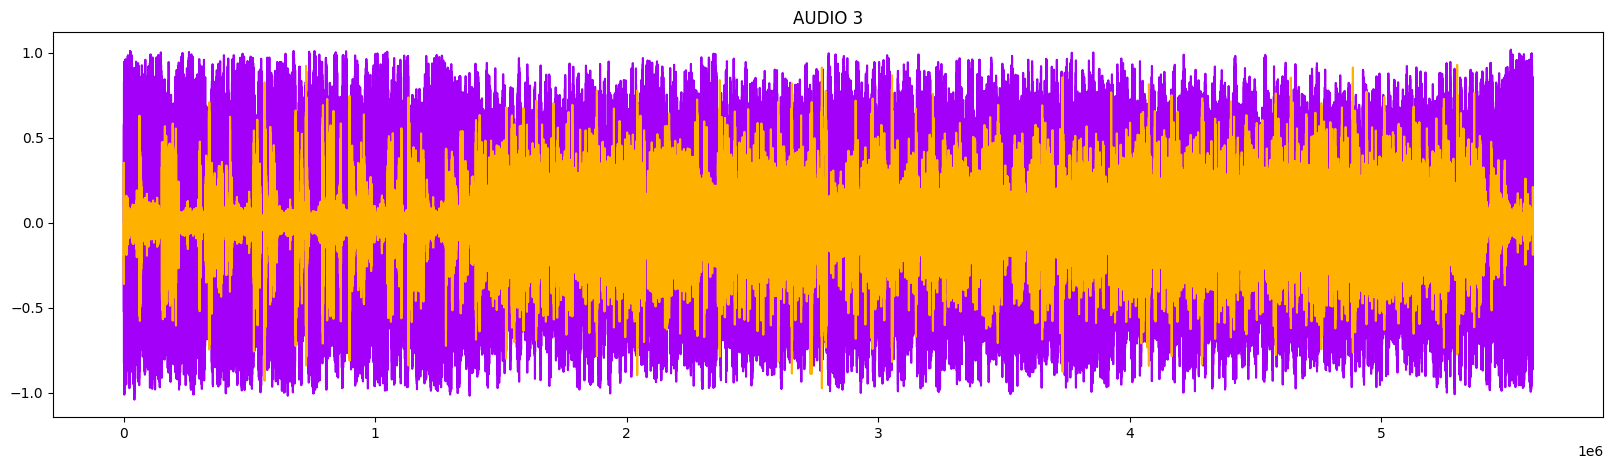

<Figure size 2000x500 with 0 Axes>

In [ ]:
y_harm, y_perc = librosa.effects.hpss(data1)
plt.plot(y_harm, color = '#A300F9')
plt.title("AUDIO 1")
plt.plot(y_perc, color = '#FFB100')
plt.figure(figsize=(20, 5))

y_harm, y_perc = librosa.effects.hpss(data2)
plt.plot(y_harm, color = '#A300F9')
plt.title("AUDIO 2")
plt.plot(y_perc, color = '#FFB100')
plt.figure(figsize=(20, 5))

y_harm, y_perc = librosa.effects.hpss(data3)
plt.plot(y_harm, color = '#A300F9')
plt.title("AUDIO 3")
plt.plot(y_perc, color = '#FFB100')
plt.figure(figsize=(20, 5))

## BUILDING NEURAL NETWORK FOR DIFFERENT FEATURES

### MFCC

#### Data Preprocessing

Getting the names of all ragas

In [ ]:
folder_path = '/content/music'

# Get all file names in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Remove the last 6 characters from each file name
raga_names = [name[:-6] for name in file_names]

# Print the modified file names
print(raga_names)

['asavari', 'yaman', 'Bhairavi', 'yaman', 'DKanada', 'yaman', 'malkauns', 'bhoopali', 'bageshree', 'darbari', 'yaman', 'bhairavi', 'bhairavi', 'sarang', 'bhoop', 'sarang', 'yaman', 'bhairavi', 'asavari', 'DKanada', 'malkauns', 'asavari', 'malkauns', 'yaman', 'bhoop', 'yaman', 'malkauns', 'asavari', 'yaman', 'bageshree', 'bhoopali', 'DKanada', 'bhoop', 'sarang', 'asavari', 'bageshree', 'sarang', 'darbari', 'bageshree', 'malkauns', 'DKanada', 'sarang', 'sarang', 'asavari', 'bageshree', 'Bhairavi', 'bageshree', 'bageshree', 'sarang', 'yaman', 'malkauns', 'bhairavi', 'sarang', 'bhoop', 'malkauns', 'Bhairavi', 'Bhairavi', 'asavari', 'malkauns', 'malkauns', 'asavari', 'sarang', 'bageshree', 'yaman', 'bhairavi', 'bageshree', 'sarang', 'darbari', 'darbari', 'Bhairavi', 'malkauns', 'bhoopali', 'asavari', 'bageshree', 'asavari', 'bageshree', 'bhoopali', 'darbari', 'bhoop', 'bageshree', 'bhoopali', 'DKanada']


In [ ]:
# Function to get mfccs values of all audio files

def mfccs_features_extractor(file):
  audio, sample_rate = librosa.load(file)
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc= 40);
  mfccs_scaled_features = np.mean(mfccs.T, axis=0)

  return mfccs_scaled_features

In [ ]:
# List to store extracted features
extracted_features = []

# Loop through each file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Extract features and append to the list
    features = mfccs_features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([file_name[:-6],features])

Converting the dataset into a Pandas Dataframe with raga name and mfccs values

In [ ]:
import pandas as pd
features_df=pd.DataFrame(extracted_features,columns=['class','features'])
features_df.head()

class                                           features
0   Asavari  [-327.15176, 69.259346, -4.7580876, 32.62181, ...
1     Yaman  [-235.48943, 187.52141, -58.78488, -25.816307,...
2  Bhairavi  [-85.030014, 149.3529, -46.506954, 1.8331522, ...
3     Yaman  [-279.9673, 52.106136, -10.332816, 48.092426, ...
4   Dkanada  [-110.84287, 153.92088, -55.985218, 5.156354, ...

In [ ]:
# Converting the data into list format

X=np.array(features_df['features'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [ ]:
# Encoding the classes

originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Asavari' 'Bageshree' 'Bhairavi' 'Bhoop' 'Bhoopali' 'Darbari' 'Dkanada'
 'Malkauns' 'Sarang' 'Yaman']
Encoded labels:  [0 1 2 3 4 5 6 7 8 9]


#### Defining the Neural Network

In [ ]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [ ]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])

In [ ]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 36, 32)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 36, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 32, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

Training the neural network

In [ ]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 50
num_batch_size = 4
checkpointer = ModelCheckpoint(filepath='saved_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
10/17 [================>.............] - ETA: 0s - loss: 4.0713 - accuracy: 0.1000 
Epoch 1: val_loss improved from inf to 2.48124, saving model to saved_model.hdf5
17/17 [==============================] - 2s 28ms/step - loss: 4.0613 - accuracy: 0.1077 - val_loss: 2.4812 - val_accuracy: 0.1176
Epoch 2/50
10/17 [================>.............] - ETA: 0s - loss: 2.1568 - accuracy: 0.2750
Epoch 2: val_loss improved from 2.48124 to 2.11692, saving model to saved_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 0s 10ms/step - loss: 2.0556 - accuracy: 0.2769 - val_loss: 2.1169 - val_accuracy: 0.2353
Epoch 3/50
 9/17 [==============>...............] - ETA: 0s - loss: 1.6975 - accuracy: 0.4444
Epoch 3: val_loss improved from 2.11692 to 1.90241, saving model to saved_model.hdf5
17/17 [==============================] - 0s 11ms/step - loss: 1.7176 - accuracy: 0.4000 - val_loss: 1.9024 - val_accuracy: 0.4706
Epoch 4/50
10/17 [================>.............] - ETA: 0s - loss: 1.2611 - accuracy: 0.5750
Epoch 4: val_loss improved from 1.90241 to 1.52015, saving model to saved_model.hdf5
17/17 [==============================] - 0s 10ms/step - loss: 1.2943 - accuracy: 0.5385 - val_loss: 1.5201 - val_accuracy: 0.4706
Epoch 5/50
10/17 [================>.............] - ETA: 0s - loss: 1.0173 - accuracy: 0.6750
Epoch 5: val_loss improved from 1.52015 to 1.47554, saving model to saved_model.hdf5
17/17 [==============================] - 0s 10ms/step - loss: 0.9255 - ac

#### Evaluating the model

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 94.11764740943909%
train set accuracy: 100.0%


### Chromagraph

#### Data Preprocessing

Getting the names of all ragas

In [36]:
# Function to get chroma values of all audio files

def chroma_features_extractor(file):
  audio, sample_rate = librosa.load(file)
  chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
  # mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc= 40);
  chroma = chroma.mean(axis=1)

  return chroma

In [37]:
# List to store extracted features
extracted_features = []

# Loop through each file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Extract features and append to the list
    features = chroma_features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([file_name[:-6],features])

Converting the dataset into a Pandas Dataframe with raga name and mfccs values

In [38]:
features_df=pd.DataFrame(extracted_features,columns=['class','features'])
features_df.head()

class                                           features
0   Asavari  [0.30264667, 0.19523776, 0.14802179, 0.1684336...
1     Yaman  [0.29386887, 0.26434427, 0.2347884, 0.26286852...
2  Bhairavi  [0.33574894, 0.40056747, 0.32229224, 0.3815198...
3     Yaman  [0.32463738, 0.3355379, 0.18043725, 0.13680673...
4   Dkanada  [0.2886337, 0.21047805, 0.49000064, 0.22896025...

In [39]:
# Converting the data into list format

X=np.array(features_df['features'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [40]:
# Encoding the classes

originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Asavari' 'Bageshree' 'Bhairavi' 'Bhoop' 'Bhoopali' 'Darbari' 'Dkanada'
 'Malkauns' 'Sarang' 'Yaman']
Encoded labels:  [0 1 2 3 4 5 6 7 8 9]


#### Defining the Neural Network

In [41]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [42]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])

In [43]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 32)             192       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 64)             10304     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 4, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [45]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

Training the network

In [46]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 50
num_batch_size = 4
checkpointer = ModelCheckpoint(filepath='saved_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
 1/17 [>.............................] - ETA: 16s - loss: 2.3111 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 2.29801, saving model to saved_model.hdf5
17/17 [==============================] - 1s 22ms/step - loss: 2.2977 - accuracy: 0.0923 - val_loss: 2.2980 - val_accuracy: 0.0588
Epoch 2/50
 1/17 [>.............................] - ETA: 0s - loss: 2.3145 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 2.29801 to 2.27571, saving model to saved_model.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 2.2905 - accuracy: 0.1231 - val_loss: 2.2757 - val_accuracy: 0.2941
Epoch 3/50
 1/17 [>.............................] - ETA: 0s - loss: 2.3186 - accuracy: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - ETA: 0s - loss: 2.2663 - accuracy: 0.1538    
Epoch 3: val_loss did not improve from 2.27571
17/17 [==============================] - 0s 6ms/step - loss: 2.2663 - accuracy: 0.1538 - val_loss: 2.2768 - val_accuracy: 0.0588
Epoch 4/50
17/17 [==============================] - ETA: 0s - loss: 2.2831 - accuracy: 0.1231    
Epoch 4: val_loss improved from 2.27571 to 2.25965, saving model to saved_model.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 2.2831 - accuracy: 0.1231 - val_loss: 2.2596 - val_accuracy: 0.1765
Epoch 5/50
 1/17 [>.............................] - ETA: 0s - loss: 2.2888 - accuracy: 0.0000e+00
Epoch 5: val_loss improved from 2.25965 to 2.22330, saving model to saved_model.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 2.2469 - accuracy: 0.0923 - val_loss: 2.2233 - val_accuracy: 0.3529
Epoch 6/50
 1/17 [>.............................] - ETA: 0s - loss: 2.0764 - accuracy: 0.5000
Epoch 6: val_loss d

#### Evaluating the model

In [47]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 64.70588445663452%
train set accuracy: 87.69230842590332%


### Zero Crossing Rate

#### Data Preprocessing

Getting the names of all ragas

In [48]:
def zero_features_extractor(file):
  audio, sample_rate = librosa.load(file)
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data1,hop_length = 512)[0]
  return zero_crossing_rate

In [49]:
# List to store extracted features
extracted_features = []

# Loop through each file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Extract features and append to the list
    features = zero_features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([file_name[:-6],features])

In [50]:
features_df=pd.DataFrame(extracted_features,columns=['class','features'])
features_df.head()

class                                           features
0   Asavari  [0.01123046875, 0.02685546875, 0.04931640625, ...
1     Yaman  [0.01123046875, 0.02685546875, 0.04931640625, ...
2  Bhairavi  [0.01123046875, 0.02685546875, 0.04931640625, ...
3     Yaman  [0.01123046875, 0.02685546875, 0.04931640625, ...
4   Dkanada  [0.01123046875, 0.02685546875, 0.04931640625, ...

In [51]:
X=np.array(features_df['features'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [52]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Asavari' 'Bageshree' 'Bhairavi' 'Bhoop' 'Bhoopali' 'Darbari' 'Dkanada'
 'Malkauns' 'Sarang' 'Yaman']
Encoded labels:  [0 1 2 3 4 5 6 7 8 9]


#### Defining the Neural Network

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [54]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])

In [55]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 12640, 32)         192       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 12640, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 12636, 64)         10304     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 12636, 64)         0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 808704)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [57]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [59]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 10
num_batch_size = 4
checkpointer = ModelCheckpoint(filepath='saved_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 2.2920 - accuracy: 0.1231
Epoch 1: val_loss improved from inf to 2.29058, saving model to saved_model.hdf5
17/17 [==============================] - 55s 3s/step - loss: 2.2920 - accuracy: 0.1231 - val_loss: 2.2906 - val_accuracy: 0.1765
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 2.2890 - accuracy: 0.0923
Epoch 2: val_loss improved from 2.29058 to 2.28903, saving model to saved_model.hdf5
17/17 [==============================] - 62s 4s/step - loss: 2.2890 - accuracy: 0.0923 - val_loss: 2.2890 - val_accuracy: 0.1765
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 2.2875 - accuracy: 0.1385
Epoch 3: val_loss improved from 2.28903 to 2.28642, saving model to saved_model.hdf5
17/17 [==============================] - 53s 3s/step - loss: 2.2875 - accuracy: 0.1385 - val_loss: 2.2864 - val_accuracy: 0.1765
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 2.2873 - acc

#### Evaluating the model

In [60]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 17.64705926179886%
train set accuracy: 13.846154510974884%
